# Homework 2 CSCI 335


# Programming Section (16 points)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [44]:
pd.set_option('display.max_columns', None)

(1 point) Load the dataset

In [45]:
#data = pd.read_csv('houses.csv')
data = pd.read_csv("https://github.com/anton-selitskiy/RIT_ML/raw/refs/heads/main/2025_spring/Week02_EDA/HW2/houses.csv", sep = ',')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


(2 points) Asses the data and clean them

In [46]:
data.shape

(20640, 10)

In [47]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [49]:
data.dropna(subset = ['total_bedrooms'], inplace=True)

In [50]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


(1 point) Create features X and target Y

In [51]:
y = data['median_house_value']
data.drop('median_house_value', inplace=True, axis=1)

In [52]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [53]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


(1 point) Divide the dataset into training, validation, and testing sets: (X_train, y_train), (X_val, y_val), and (X_test, y_test)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

 (1 point) Create a transformation (ColumnTransformer) that applies OneHotEncoder to the
nominal column only (remainder='passthrough'). Fit it with X_train and print the first five lines
of the transformed X_train.

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [58]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(drop='first'), ['ocean_proximity'])], remainder='passthrough')
columnTransformer.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(drop='first'),
                                 ['ocean_proximity'])])

In [59]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
10178,-117.96,33.86,35.0,2146.0,430.0,1230.0,429.0,3.7813,<1H OCEAN
3020,-119.50,35.27,23.0,3827.0,696.0,1993.0,617.0,3.0742,INLAND
14194,-117.04,32.71,28.0,5274.0,991.0,3727.0,961.0,3.5700,NEAR OCEAN
12392,-116.41,33.74,17.0,4289.0,893.0,958.0,440.0,2.4659,INLAND
18053,-121.99,37.25,25.0,1743.0,212.0,604.0,200.0,10.7582,<1H OCEAN


(3 points) Train KNeighborsRegressor on the transformed X_train and select the value of k on
the transformed X_val. Choose a metric that you think evaluates this problem the best. Please,
state why you chose it.

In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

In [88]:
train_accuracy = []
mse_train_accuracy = []
val_accuracy = []
mse_val_accuracy = []
for i in range(1, 50):
    pipe1 = Pipeline([('colTr', columnTransformer), ('reg', KNeighborsRegressor(n_neighbors=i))])
    pipe1.fit(X_train, y_train)
    train_accuracy.append(mean_absolute_error(pipe1.predict(X_train),y_train))
    val_accuracy.append(mean_absolute_error(pipe1.predict(X_val),y_val))
    mse_train_accuracy.append(mean_squared_error(pipe1.predict(X_train),y_train))
    mse_val_accuracy.append(mean_squared_error(pipe1.predict(X_val),y_val))

In [89]:
import matplotlib.pyplot as plt

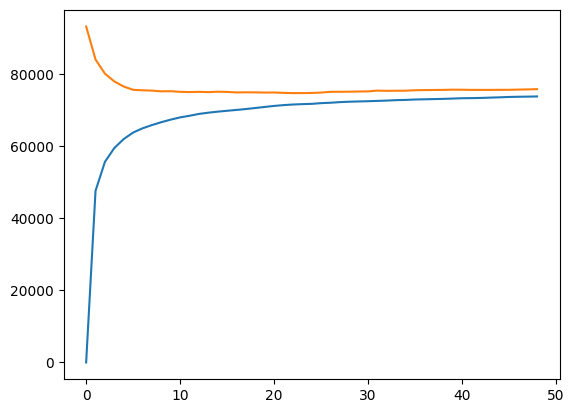

In [101]:
plt.plot(train_accuracy)
plt.plot(val_accuracy)

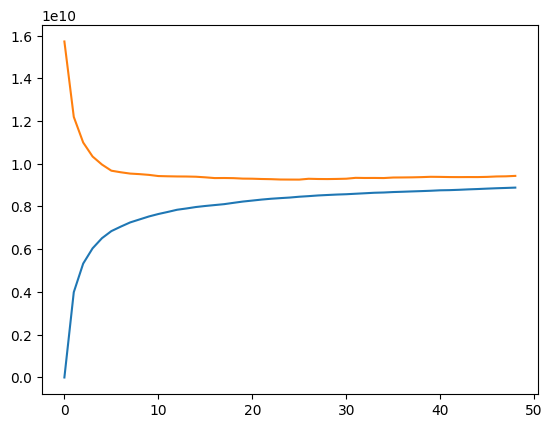

In [103]:
plt.plot(mse_train_accuracy)
plt.plot(mse_val_accuracy)

In [104]:
best_k1 = np.argmin(val_accuracy)+1
best_k1

23

In [106]:
mse_best_k1 = np.argmin(mse_val_accuracy)+1
mse_best_k1

26

After training KNeighborsRegressor on the transformed X_train data, I believe that the better metric for evaluating this problem is mean_absolute_error. I plotted the information for both mean_absolute_error and mean_squared_error. The plots show me that mean_absolute_error got the training and value accuracies closer than when using mean_squared_error.

Also, the best value for k using mean_absolute_error as the best metric is 23.

(1 point) Report the results using X_test and an appropriate metric.

In [114]:
X_train_val = pd.concat([X_train, X_val], ignore_index=True)
y_train_val = pd.concat([y_train, y_val], ignore_index=True)

In [115]:
pipe1 =Pipeline([('tr', columnTransformer),('reg', KNeighborsRegressor(n_neighbors=best_k1))])
pipe1.fit(X_train,y_train)
print('Error after training on Train:', mean_absolute_error(pipe1.predict(X_test),y_test))
pipe1.fit(X_train_val,y_train_val)
print('Error after training on Train+Validation:', mean_absolute_error(pipe1.predict(X_test),y_test))

Error after training on Train: 75900.40805948873
Error after training on Train+Validation: 75628.90838395336


(1 point) Modify the transformation applying a scaler to all numerical columns

In [116]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [118]:
train_accuracy_scaler = []
val_accuracy_scaler =[]
for i in range(1,50):
  pipe2 =Pipeline([('tr', columnTransformer),('scaler', StandardScaler()),('reg', KNeighborsRegressor(n_neighbors=i))])
  pipe2.fit(X_train,y_train)
  train_accuracy_scaler.append(mean_absolute_error(pipe2.predict(X_train),y_train))
  val_accuracy_scaler.append(mean_absolute_error(pipe2.predict(X_val),y_val))

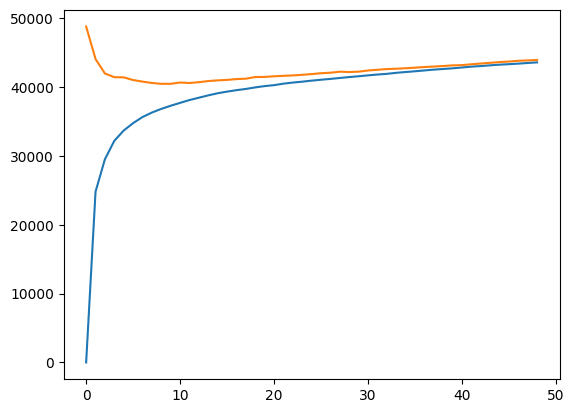

In [119]:
plt.plot(train_accuracy_scaler)
plt.plot(val_accuracy_scaler)

In [120]:
best_k2 = np.argmin(val_accuracy_scaler)+1
best_k2

10

(3 point) Repeat the training with the scaled data.

In [121]:
pipe2 =Pipeline([('tr', columnTransformer),('sc', StandardScaler()),('reg', KNeighborsRegressor(n_neighbors=best_k2))])
pipe2.fit(X_train,y_train)
print('Error after training on Train:', mean_absolute_error(pipe2.predict(X_test),y_test))
pipe2.fit(X_train_val,y_train_val)
print('Error after training on Train+Validation:', mean_absolute_error(pipe2.predict(X_test),y_test))

Error after training on Train: 41604.34024957181
Error after training on Train+Validation: 40843.28062148274


(2 point) Discuss the results. I would suggest plotting histograms of the errors for both cases. If
the results are different, can you think of the reason?

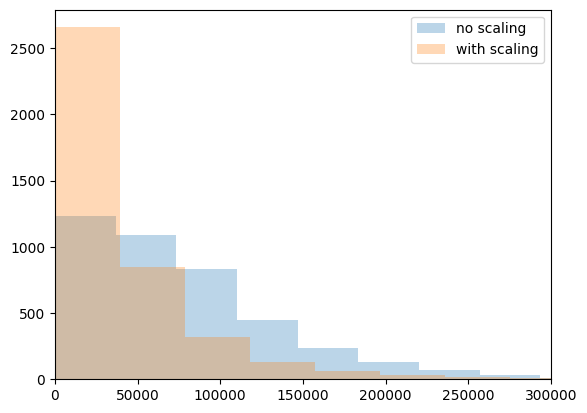

In [122]:
plt.hist(np.abs((pipe1.predict(X_test)-y_test)),  alpha=0.3, label='no scaling')
plt.hist(np.abs((pipe2.predict(X_test)-y_test)),  alpha=0.3, label='with scaling')
plt.xlim(0, 300000)
plt.legend()

AA

# Writing Assesment (4 points)

(2 point) What is the difference between supervised and unsupervised problems?

(2 point) What is the purpose of splitting data into training, validation, and testing sets? What is a
typical split-up?